In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os


In [2]:
for dirname, _, filename in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [4]:
data = "C:/Users/utilisateur/OneDrive - Simplonformations.co/Bureau/Formation IA/Story_27_baysen/adult.csv"

In [5]:
df = pd.read_csv(data, header=None, sep=",\s")

# Exlporatory data analysis

In [6]:
#Dimension
df.shape

(32561, 15)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Rename column names

In [8]:
col_names = ["age","workclass","fnlwgt","education","education_num","marital_status",
            "occupation","relationship","race","sex","capital_gain","capital_loss",
            "hours_per_week","native_country","income"]

df.columns = col_names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
#let's again preview dataset
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# View summary dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Explore catégorical variables

In [15]:
#find categorical variables
categorical = [var for var in df.columns if df[var].dtype=="O"]

print(f"There are {(len(categorical))}")

print(f"The categorical variables are {categorical}")
               

There are 9
The categorical variables are ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [16]:
#view the catégorical variables
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


# Missing values in categorical variables

In [17]:
#check missing values in categorical variables
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

# Frequency counts of categorical variables

In [18]:
for var in categorical:
    print(df[var].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

In [19]:
# view frequency distributiuon of categorical variables

for var in categorical:
    print(df[var].value_counts()/np.float(len(df)))

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64


## explore worklass variable

In [20]:
#check labels in workclass variable
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [21]:
# check frequency distribution of values in workclasse variable
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [22]:
# replace "?" values with "NaN"
df["workclass"].replace("?", np.NaN, inplace=True)

In [23]:
#Again check the frequency distribution of values in workclass variable
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

## Explore occupation variable

In [25]:
#check labels in occupation variable
df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [27]:
#check frequency distribution of values in occupation variable
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [28]:
# replace "?" values with "NaN"
df["occupation"].replace("?", np.NaN, inplace=True)

In [29]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

## Explore native_country variable

In [30]:
df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [31]:
df.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [32]:
# replace "?" values with "NaN"
df["native_country"].replace("?", np.NaN, inplace=True)

In [34]:
df.native_country.value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

## Check missing values in categorical variables again 

In [36]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

## Number of labels : cardinality

In [38]:
#check for cardinality in categorical variables

for var in categorical:
    print(f"{var} contains {len(df[var].unique())} labels")

workclass contains 9 labels
education contains 16 labels
marital_status contains 7 labels
occupation contains 15 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native_country contains 42 labels
income contains 2 labels


## Explore Numérical Variables

In [39]:
#Find numerical variables
numerical = [var for var in df.columns if df[var].dtype != "O"]

print(f"There are {len(numerical)} numerical variables")

print(f"The numerical variables are {numerical}")

There are 6 numerical variables
The numerical variables are ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [40]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [41]:
#check missing values
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

# Declare feature vector and target variable

In [42]:
X = df.drop(["income"], axis=1)
y = df["income"]

# Split data into separata traininig and test set

In [43]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 0)

In [45]:
#check the shape of X_train and X_test
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

# Featuring Engineering

In [47]:
#check data types in X_train
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [48]:
#display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == "O"]

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [49]:
#display numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes !="O"]
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

## Engeneering missing values in categorical variables

In [53]:
#print % of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()*100

workclass         5.598456
education         0.000000
marital_status    0.000000
occupation        5.607231
relationship      0.000000
race              0.000000
sex               0.000000
native_country    1.816427
dtype: float64

In [52]:
#print categorical variables with missing data
for col in categorical:
    if X_train[col].isnull().mean() > 0:
        print(col, (X_train[col].isnull().mean())*100)

workclass 5.598455598455598
occupation 5.6072306072306075
native_country 1.8164268164268167


In [54]:
# Impute missing categorical variables qith most frequent value

for df2 in [X_train, X_test]:
    df2["workclass"].fillna(X_train["workclass"].mode()[0], inplace=True)
    df2["occupation"].fillna(X_train["occupation"].mode()[0], inplace=True)
    df2["native_country"].fillna(X_train["native_country"].mode()[0], inplace=True)

In [55]:
#check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [56]:
#check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [57]:
#check missing values in X_train

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [58]:
#check missing values in X_test
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

## Encoding categorical variables 

In [59]:
#print categorical variables

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [60]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [63]:
#import category encoders
import category_encoders as ce

In [64]:
#encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols = ["workclass",
                                  "education",
                                  "marital_status",
                                  "occupation",
                                  "relationship",
                                  "race",
                                  "sex",
                                  "native_country"])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [65]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X_train.shape

(22792, 105)

In [67]:
X_test.shape

(9769, 105)

# Featuring Scaling 

In [68]:
cols = X_train.columns

In [69]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
X_train = pd.DataFrame(X_train, columns = [cols])

In [71]:
X_test = pd.DataFrame(X_test, columns = [cols])

In [72]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model training

In [73]:
# train gaussian naive bayes classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

# Predict results

In [74]:
y_pred = gnb.predict(X_test)

In [75]:
y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

# Check accuracy score

In [79]:
from sklearn.metrics import accuracy_score
print("Model accuracy score : {0:0.4f}". format(accuracy_score(y_test,y_pred)))

Model accuracy score : 0.8083


### Compare the train set and test set accuracy

In [80]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['>50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [81]:
print("Training accuracy score : {0:0.4f}". format(accuracy_score(y_train, y_pred_train)))

Training accuracy score : 0.8067


### Check for overfitting and underfitting

In [83]:
#print the scores on training and test set
print(f"Training set score : {gnb.score(X_train,y_train):.4f}")
print(f"Test set score : {gnb.score(X_test,y_test):.4f}")

Training set score : 0.8067
Test set score : 0.8083


### Compare model accuracy with null accuracy

In [84]:
#check class distribution in test set
y_test.value_counts()

<=50K    7407
>50K     2362
Name: income, dtype: int64

In [85]:
#checl null accuracy score
null_accuracy = (7407/(7407+2362))
print(f"Null accuracy score : {null_accuracy:.4f}")

Null accuracy score : 0.7582


# Confusion matrix 

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(f"Confusion matrix \n\n {cm}")
print(f"\nTrue positives(TP) = {cm[0,0]}")
print(f"\nTrue negatives(TN) = {cm[1,1]}")
print(f"\nFalse positives(FP) = {cm[0,1]}")
print(f"\nFalse negatives(FN) = {cm[1,0]}")

Confusion matrix 

 [[5999 1408]
 [ 465 1897]]

True positives(TP) = 5999

True negatives(TN) = 1897

False positives(FP) = 1408

False negatives(FN) = 465


<AxesSubplot:>

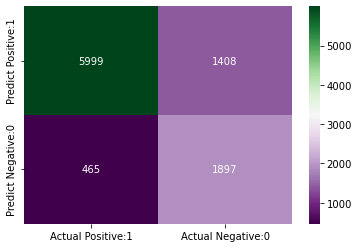

In [91]:
#confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns = ["Actual Positive:1", "Actual Negative:0"],
                        index = ["Predict Positive:1","Predict Negative:0"])

sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="PRGn")

# Classification metrics

###  Classification Report

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769



### Classification accuracy 

In [93]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [94]:
classification_accuracy = (TP+TN)/float(TP+TN+FP+FN)
print(f"Classification accuracy : {classification_accuracy:.4f}")

Classification accuracy : 0.8083


### Classification error

In [96]:
classification_error = (FP+FN)/float(TP+TN+FP+FN)
print(f"Classification error : {classification_error:.4f}")

Classification error : 0.1917


### Precision

In [97]:
precision = TP/float(TP+FP)
print(f"Precision : {precision:.4f}")

Precision : 0.8099


### Recall 

In [100]:
recall = TP/float(TP+FN)
print(f"Recall or sensitivity : {recall:.4f}")

Recall or sensitivity : 0.9281


### True Positive Rate

In [101]:
true_positive_rate = TP/float(TP+FN)
print(f"True positive Rate : {true_positive_rate:.4f}")

True positive Rate : 0.9281


### False Positive Rate

In [127]:
false_positive_rate = TN/(TN+FP)
print(f"False positive Rate : {false_positive_rate*100:.4f} % ")

False positive Rate : 57.3979 % 


# Calculate class probabilities

In [103]:
#print the firts 10 predicted proba of two classes 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob

array([[9.99999426e-01, 5.74152436e-07],
       [9.99687907e-01, 3.12093456e-04],
       [1.54405602e-01, 8.45594398e-01],
       [1.73624321e-04, 9.99826376e-01],
       [8.20121011e-09, 9.99999992e-01],
       [8.76844580e-01, 1.23155420e-01],
       [9.99999927e-01, 7.32876705e-08],
       [9.99993460e-01, 6.53998797e-06],
       [9.87738143e-01, 1.22618575e-02],
       [9.99999996e-01, 4.01886317e-09]])

In [104]:
#Store the proba in DataFrame
y_pred_prob_df = pd.DataFrame(data = y_pred_prob, columns =["Prob of  <= 50K","Prob of > 50k"])
y_pred_prob_df

,Prob of <= 50K,Prob of > 50k
0,9.999994e-01,5.741524e-07
1,9.996879e-01,3.120935e-04
2,1.544056e-01,8.455944e-01
3,1.736243e-04,9.998264e-01
4,8.201210e-09,1.000000e+00
5,8.768446e-01,1.231554e-01
6,9.999999e-01,7.328767e-08
7,9.999935e-01,6.539988e-06
8,9.877381e-01,1.226186e-02
9,1.000000e+00,4.018863e-09


In [105]:
#print 10 first proba class 1

gnb.predict_proba(X_test)[0:10,1]

array([5.74152436e-07, 3.12093456e-04, 8.45594398e-01, 9.99826376e-01,
       9.99999992e-01, 1.23155420e-01, 7.32876705e-08, 6.53998797e-06,
       1.22618575e-02, 4.01886317e-09])

In [113]:
# Store the predict proba for class 1
y_pred1 = gnb.predict_proba(X_test)[:,1]

Text(0, 0.5, 'Frequency')

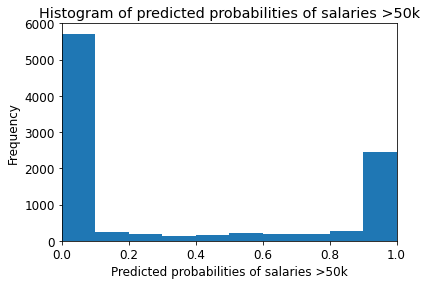

In [114]:
#plot histogram of predicted proba
#Adjust the size
plt.rcParams["font.size"] = 12

#Plot histo with 10 bins
plt.hist(y_pred1, bins = 10)

#Title
plt.title("Histogram of predicted probabilities of salaries >50k")

#Set the x-axis limit
plt.xlim(0,1)

#Set the title
plt.xlabel("Predicted probabilities of salaries >50k")
plt.ylabel("Frequency")

# ROC - AUC

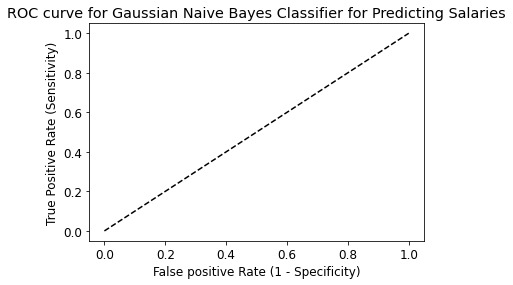

In [115]:
from sklearn.metrics import roc_curve
fpr, tpr, tresholds = roc_curve(y_test, y_pred1, pos_label = ">50k")
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], "k--")
plt.rcParams["font.size"] = 12
plt.title("ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries")
plt.xlabel("False positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.show()

### ROC AUC

In [126]:
#compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print(f"ROC AUC : {ROC_AUC*100:.4f} %")

ROC AUC : 89.4083 %


In [125]:
#Cross validated ROC AUC
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring ="roc_auc").mean()
print(f"Cross Validated ROC AUC : {Cross_validated_ROC_AUC*100:.4f} %")

Cross Validated ROC AUC : 89.3772 %


# K-fold Cross Validation

In [121]:
#Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X_train, y_train, cv=10, scoring = "accuracy")
print(f"Cross-validation scores :\n {scores}")

Cross-validation scores :
 [0.81359649 0.80438596 0.81175954 0.8056165  0.79596314 0.79684072
 0.81044318 0.81175954 0.80210619 0.81044318]


In [124]:
#Compute Average cross validation score
print(f"Average cross validation score : {scores.mean()*100:.4f} %")

Average cross validation score : 80.6291 %
